# Код Шеннона-Фано


In [12]:
with open('file.txt', encoding='utf-8', mode='r') as file:
    text = file.read()

text

'Древность\n\nУстная передача — самый древний способ передачи знаний в истории человечества. После изобретения древними цивилизациями систем записи люди начали использовать для письма почти всё, на чём можно писать — глиняные таблички, кору дерева, листы металла и т. п.\nТаблички\nШумерская глиняная табличка с клинописью\n\nТабличку можно определить как физически прочный, надёжный носитель письменной информации, относительно удобный в повседневном использовании и транспортировке. Пишущим средством в этом случае, как правило, выступало стило. Можно выделить два основных типа табличек: глиняные (например, у населения долины между Тигром и Евфратом), которые часто использовались для письма клинописью[4], и восковые. Последние представляли собой дощечки, покрытые слоем воска, в то время как глиняные полностью состояли из глины и после нанесения надписей часто обжигались для придания им дополнительной прочности. После этой процедуры, соответственно, изменить текст было уже невозможно; напро

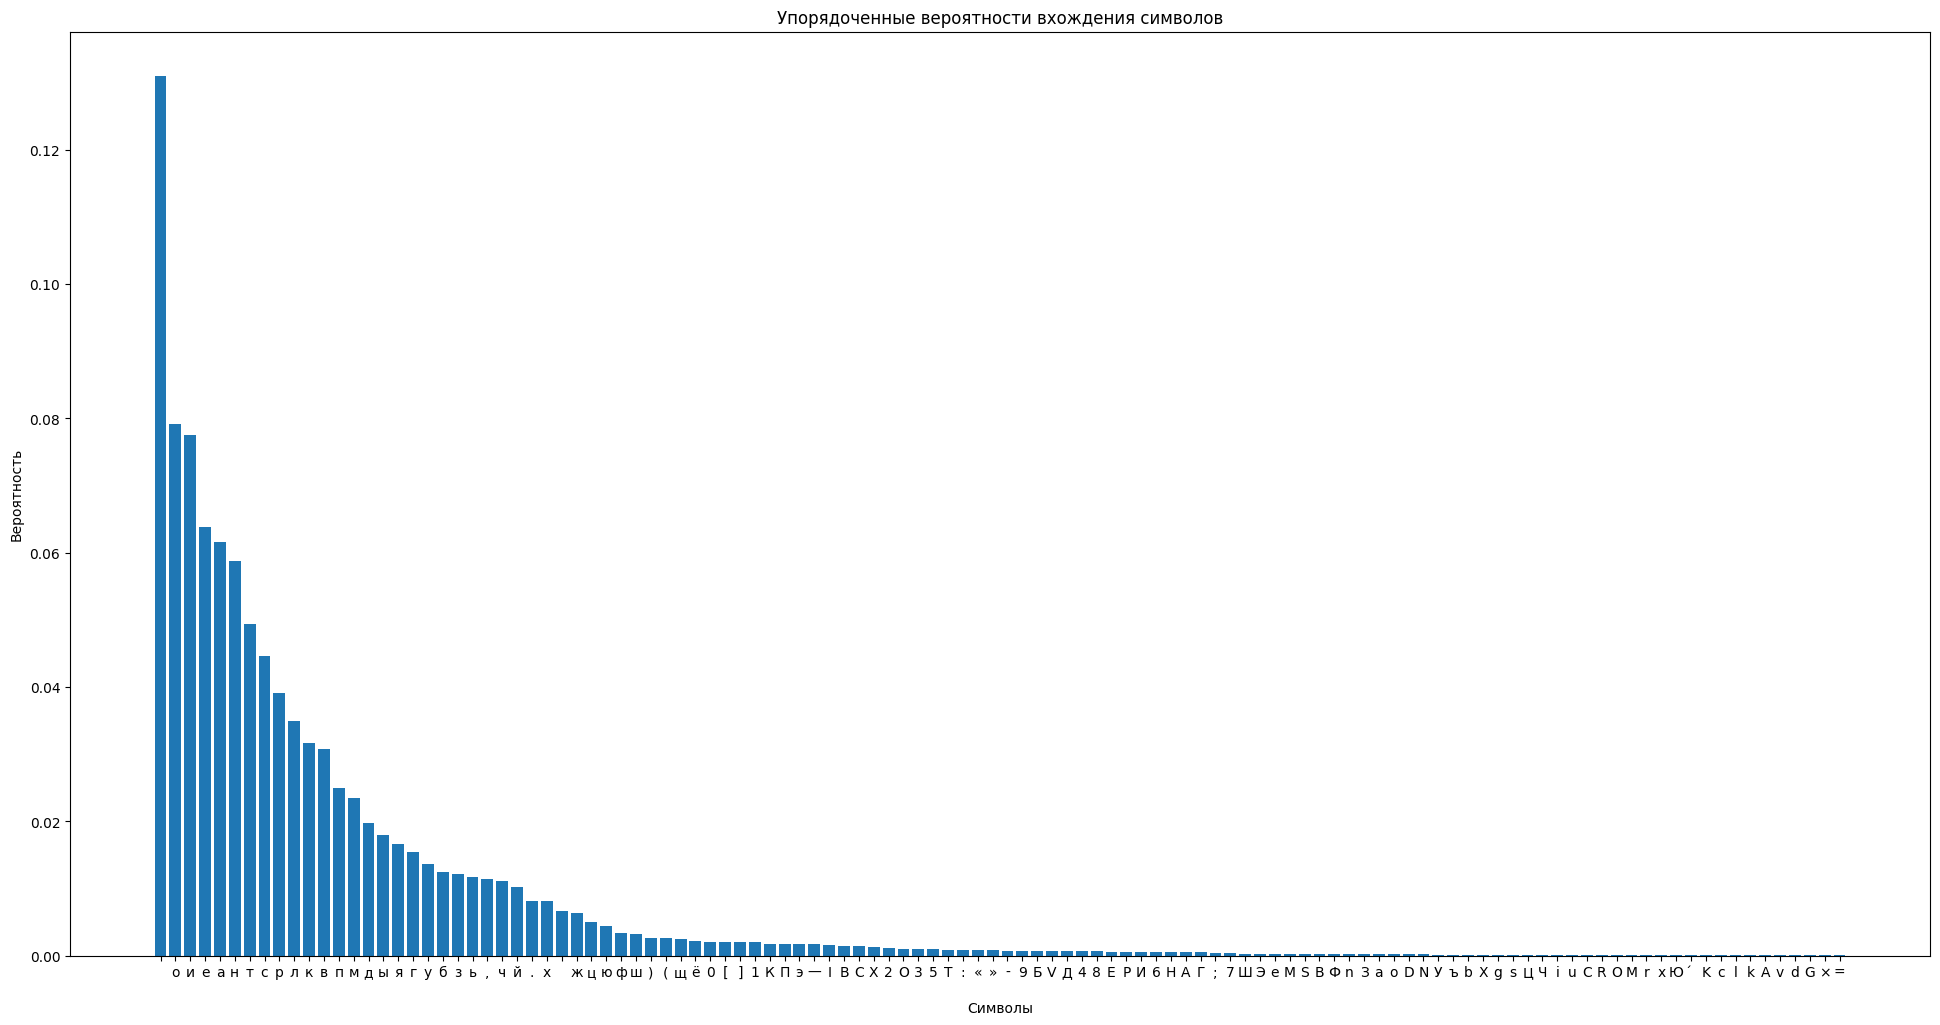

In [20]:
import matplotlib.pyplot as plt

from collections import Counter, OrderedDict

sym_counter = Counter(text)
sc_len = sum(sym_counter.values())
symd = {
    letter: count / sc_len
    for letter, count in sym_counter.items()
}

alphabet_probas = OrderedDict(sorted(
    symd.items(),
    key=lambda kv: kv[1],
    reverse=True,
))

plt.figure(figsize=(24, 12))
plt.bar(alphabet_probas.keys(), alphabet_probas.values())
plt.xlabel('Символы')
plt.ylabel('Вероятность')
plt.title('Упорядоченные вероятности вхождения символов')
plt.show()

In [14]:
letter_list = list(alphabet_probas.keys())
letter_probas = list(alphabet_probas.values())

In [15]:
def best_partition(initial, final):
    # Points.
    pts = []
    for i in range(initial + 1, final):
        diff = abs(sum(letter_probas[initial:i]) - sum(letter_probas[i:final]))
        pts.append(diff)

    print(pts.index(min(pts)) + initial)
    if pts.index(min(pts)) < initial:
        return pts.index(min(pts)) + initial

    return pts.index(min(pts))


def up(initial, final):
    for i in range(initial, final):
        sym_counter[i] = sym_counter[i] + '0'


def down(initial, final):
    for i in range(initial, final):
        sym_counter[i] = sym_counter[i] + '1'

In [16]:
initial = 0
final = len(letter_probas)
sym_counter = [''] * (len(letter_probas))
current_index = [(initial, final)]
new_index = []
stage = 1
while current_index:
    print(f'Stage: {stage}')
    print(sym_counter)
    new_index = []
    for index in current_index:
        if index[1] - index[0] == 2:
            sym_counter[index[0]] = sym_counter[index[0]] + '0'
            sym_counter[index[1] - 1] = sym_counter[index[1] - 1] + '1'

        if index[1] - index[0] > 2:
            index_ptr = best_partition(index[0], index[1]) + 1
            new_index.append((index[0], index_ptr))
            up(index[0], index_ptr)
            new_index.append((index_ptr, index[1]))
            down(index_ptr, index[1])
        current_index = new_index
    print()
    stage += 1

# for last stage
if not current_index:
    print(f'Stage: {stage}')
    print(sym_counter)
    new_index = []

Stage: 1
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
6

Stage: 2
['0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '

In [17]:
import pandas as pd

pd.DataFrame({
    'Символ': letter_list,
    'Вероятность': letter_probas,
    'Кодовое слово': sym_counter,
})

,Символ,Вероятность,Кодовое слово
0,,0.131056,000
1,о,0.079121,0010
2,и,0.077529,0011
3,е,0.063811,0100
4,а,0.061614,0101
...,...,...,...
109,v,0.000047,111111111111100
110,d,0.000047,111111111111101
111,G,0.000047,111111111111110
112,×,0.000047,1111111111111110


## Кодирование текста

In [18]:
coder = {
    c: sym_counter[i]
    for i, c in enumerate(letter_list)
}

encoded_message = ''.join(
    coder[c]
    for c in text
)
print(f'Закодированное сообщение:\n{encoded_message}')

Закодированное сообщение:
11111110011011000010011010001100010100111111010111110100111101001111111110101110011101100101111000000011010101001100001001101110010111101110101000111110111100010010111011011011111111000000110111011000010011010001100011111100000010110101001010001011100110001101010100110000100110111001011110111001100011101000110010101100011111100000011010000000111001110010110000011001100011101110100110010001011010001001110111010010011111010001011111001000011111011010010101100100100000001111101000010111001111000010001110100011000111110000000110111011000010011010001100011110110001100011110110001111010000111100100011111010001011111011000111110000110110001100010001110011101001101100001110100010111010100111000110001100101111011101101110001100001100101111011101011100100011000001110110101001011001011101011110100001011010001010111111010100011011101100101110000000110101001110111010111011001010001101010010111011101110011000110100101111100111111011000001100101000111011111111001111101100001

## Эффективность сжатия

In [19]:
plain_len = len(''.join(format(ord(x), 'b') for x in text))
encoded_len = len(encoded_message)

print(f'Эффективность сжатия: {1 - (encoded_len / plain_len):.10f}')

Эффективность сжатия: 0.4930761640
